# **Step 1: Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Load the Dataset

In [2]:
# Load the dataset
file_path = '/content/Housing.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Step 3: Exploratory Data Analysis (EDA)**

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mea

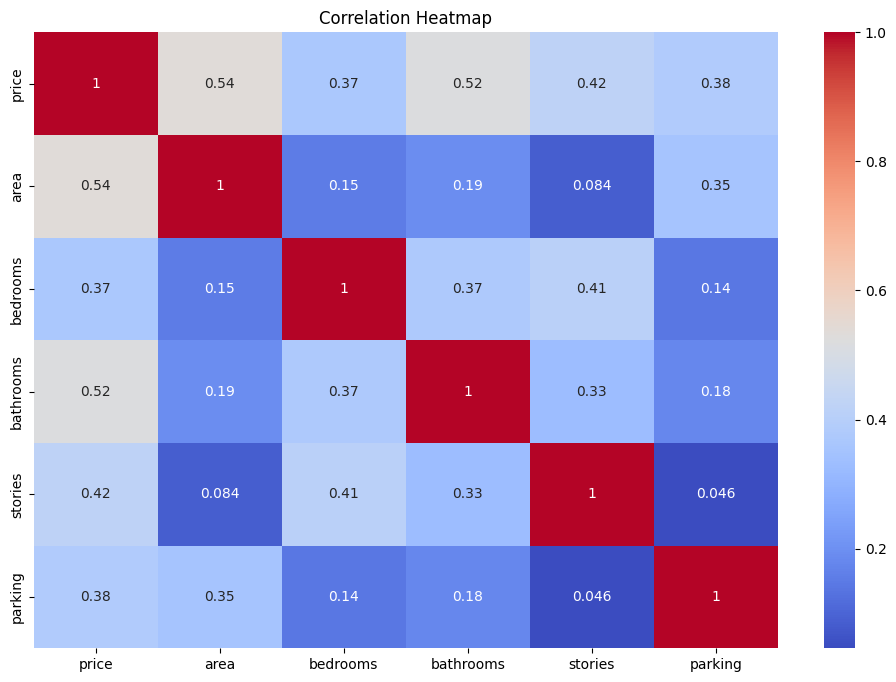

In [4]:
# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



# **Step 4: Preprocessing**

In [5]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [9]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


# **Step 5: Split the Data**

In [10]:
X = data.drop('price', axis=1)  # Replace 'Price' with the target variable's name
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 6: Model Implementation**

In [11]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression RMSE: 0.7122893757982467
R2 Score: 0.6494754192267794


Ridge **Regression**

In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression RMSE: 0.7123919576230516
R2 Score: 0.6493744489144322


**Lasso Regression**

In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression RMSE: 0.8065812792364349
R2 Score: 0.5505288502166072


# **Step 7: Model Comparison**

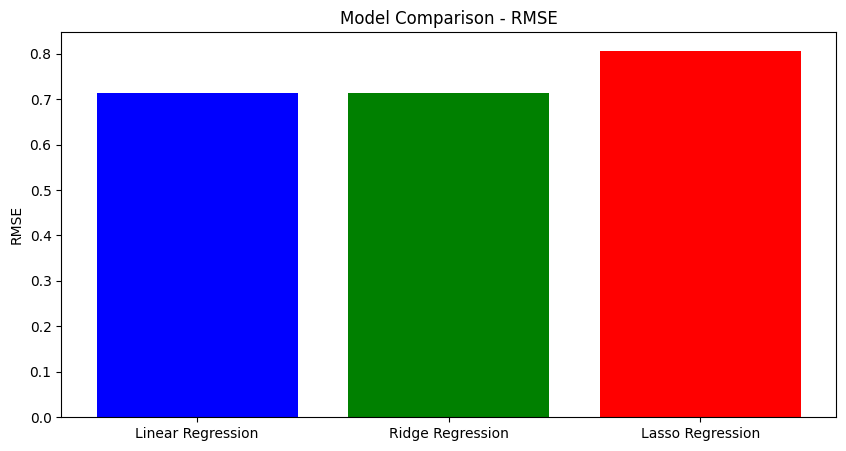

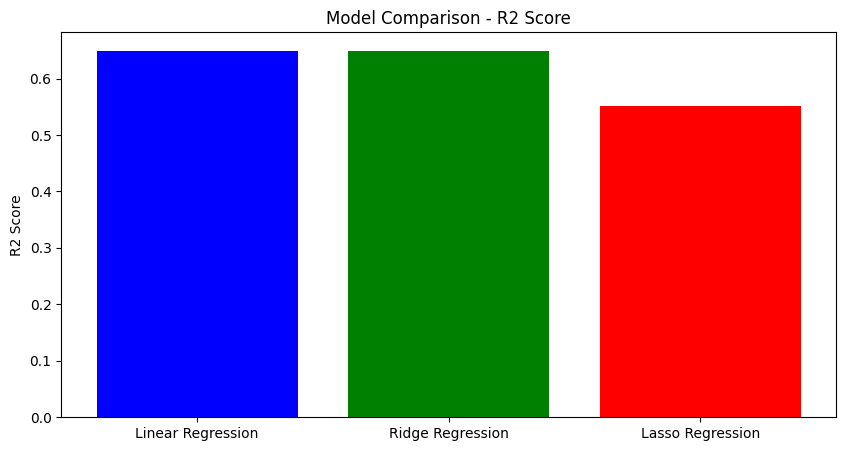

In [14]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse = [
    np.sqrt(mean_squared_error(y_test, y_pred)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
]

r2 = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
]

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(models, rmse, color=['blue', 'green', 'red'])
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, r2, color=['blue', 'green', 'red'])
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.show()


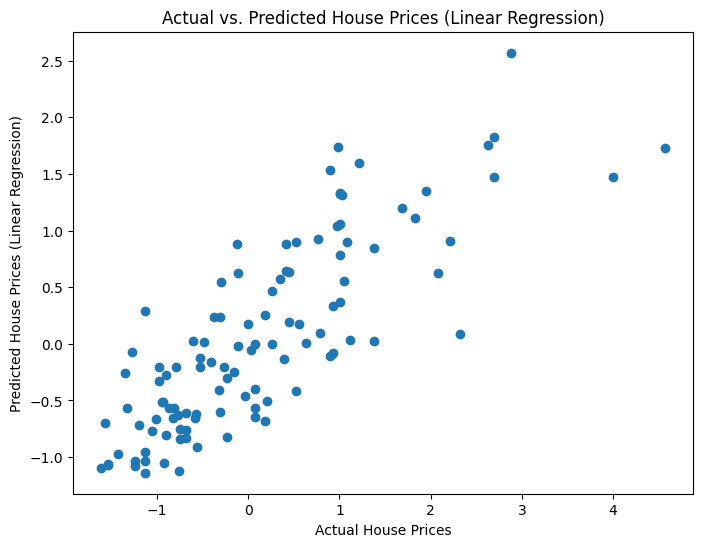

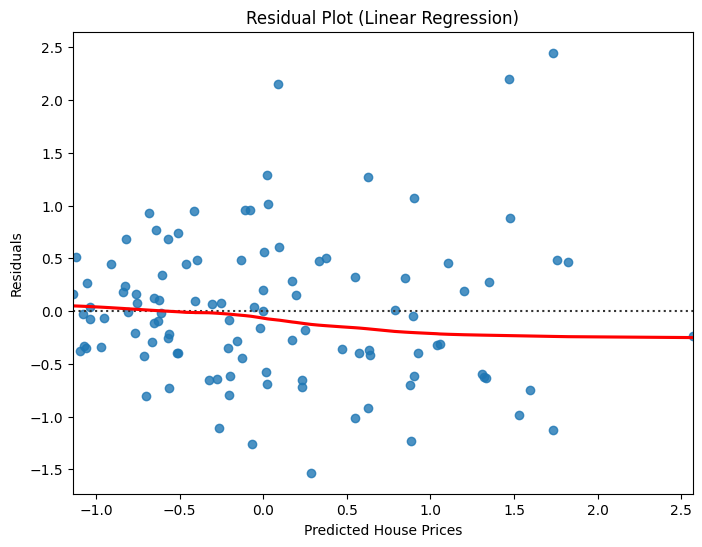

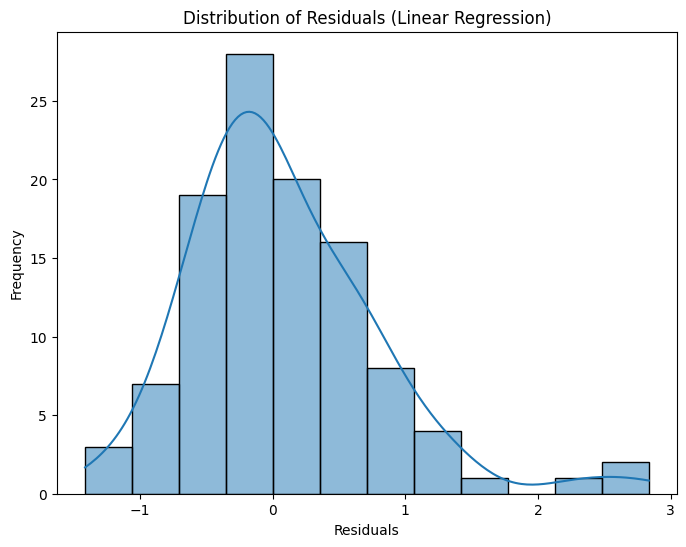

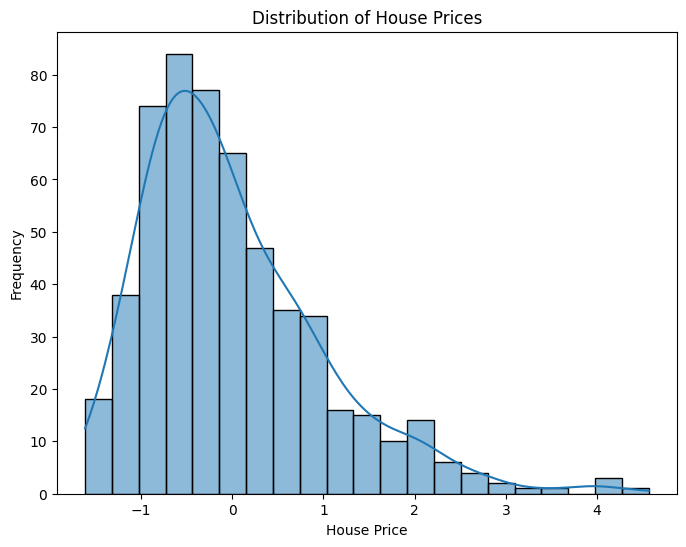

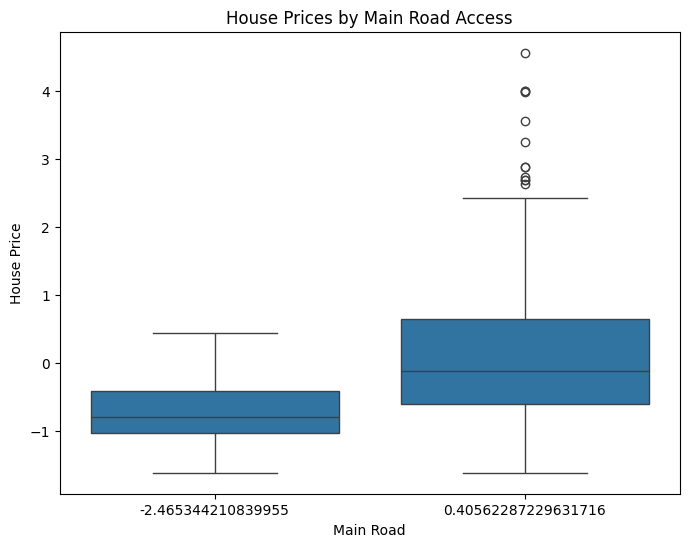

In [17]:


# Assuming 'data' DataFrame and other variables (y_pred, y_pred_ridge, y_pred_lasso, y_test) are already defined from the previous code.

# Scatter plot of actual vs predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (Linear Regression)")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.show()


# Residual plot for Linear Regression
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Linear Regression)")
plt.show()


# Additional visualizations (example: distribution of house prices)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

# Boxplot of house price based on a categorical feature (example: 'mainroad')
plt.figure(figsize=(8, 6))
sns.boxplot(x='mainroad', y='price', data=data)
plt.xlabel("Main Road")
plt.ylabel("House Price")
plt.title("House Prices by Main Road Access")
plt.show()